In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam 
from keras.utils.np_utils import to_categorical


In [9]:
n_pts = 500
centers = [-1, 1], [-1,-1] , [1,-1], [1,1],[0,0]
X,y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers = centers, cluster_std=0.4)

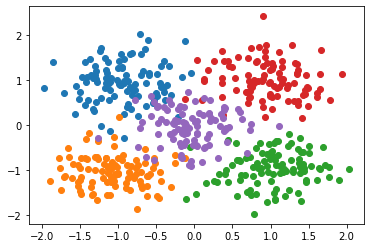

In [10]:
plt.scatter(X[y==0 , 0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.scatter(X[y==3,0], X[y==3,1])
plt.scatter(X[y==4,0], X[y==4,1])

In [11]:
print(y)
y_cat = to_categorical(y,5)
print(y_cat)

[3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3 3 0 2 4 0 4 1 3 

In [14]:
model = Sequential()
model.add(Dense(units=5,input_shape = (2,), activation = 'softmax'))
model.compile(Adam(0.1),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [16]:
history =model.fit(X,y_cat,verbose=1,batch_size=50,epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 1ms/step - loss: 1.3506 - accuracy: 0.4387
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6337 - accuracy: 0.8292
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.9206
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3337 - accuracy: 0.9497
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2905 - accuracy: 0.9480
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2411 - accuracy: 0.9480
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2499 - accuracy: 0.9434
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2321 - accuracy: 0.9497
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2381 - accuracy: 0.9332
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2114 - accuracy: 0.9361
Epoch 11/

In [17]:
def plot_multiclass_decision_boundary(X,y,model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)

    xx,yy = np.meshgrid(X_span , y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]

    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)

    plot.contourf(xx , yy ,z)